In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [6]:
data = pd.read_csv('D:\project\dataset\CSV_Files\AirPassengers.csv')
data.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data.dtypes

Month            object
AirPassengers     int64
dtype: object

In [9]:
data['Month'] = pd.DatetimeIndex(data['Month'])# Convert Object to time in dataframe
data.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
data.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [17]:
data.set_index('Month')

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

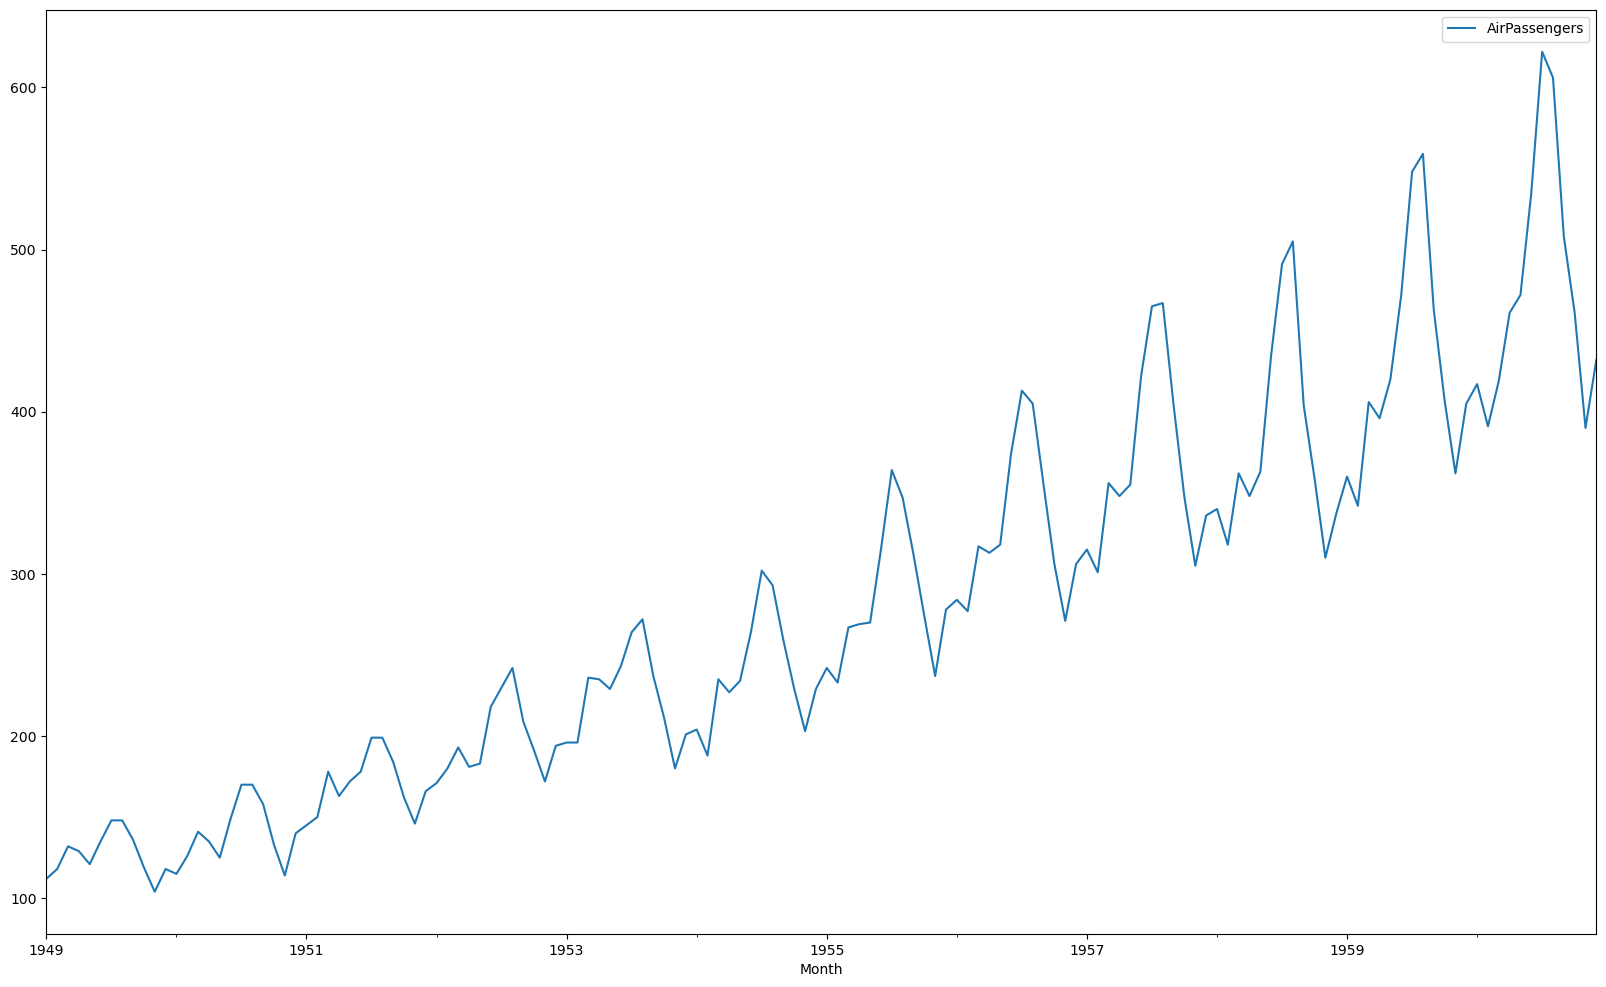

In [11]:
data.set_index('Month').plot(figsize=(20, 12))# the best way for plotting

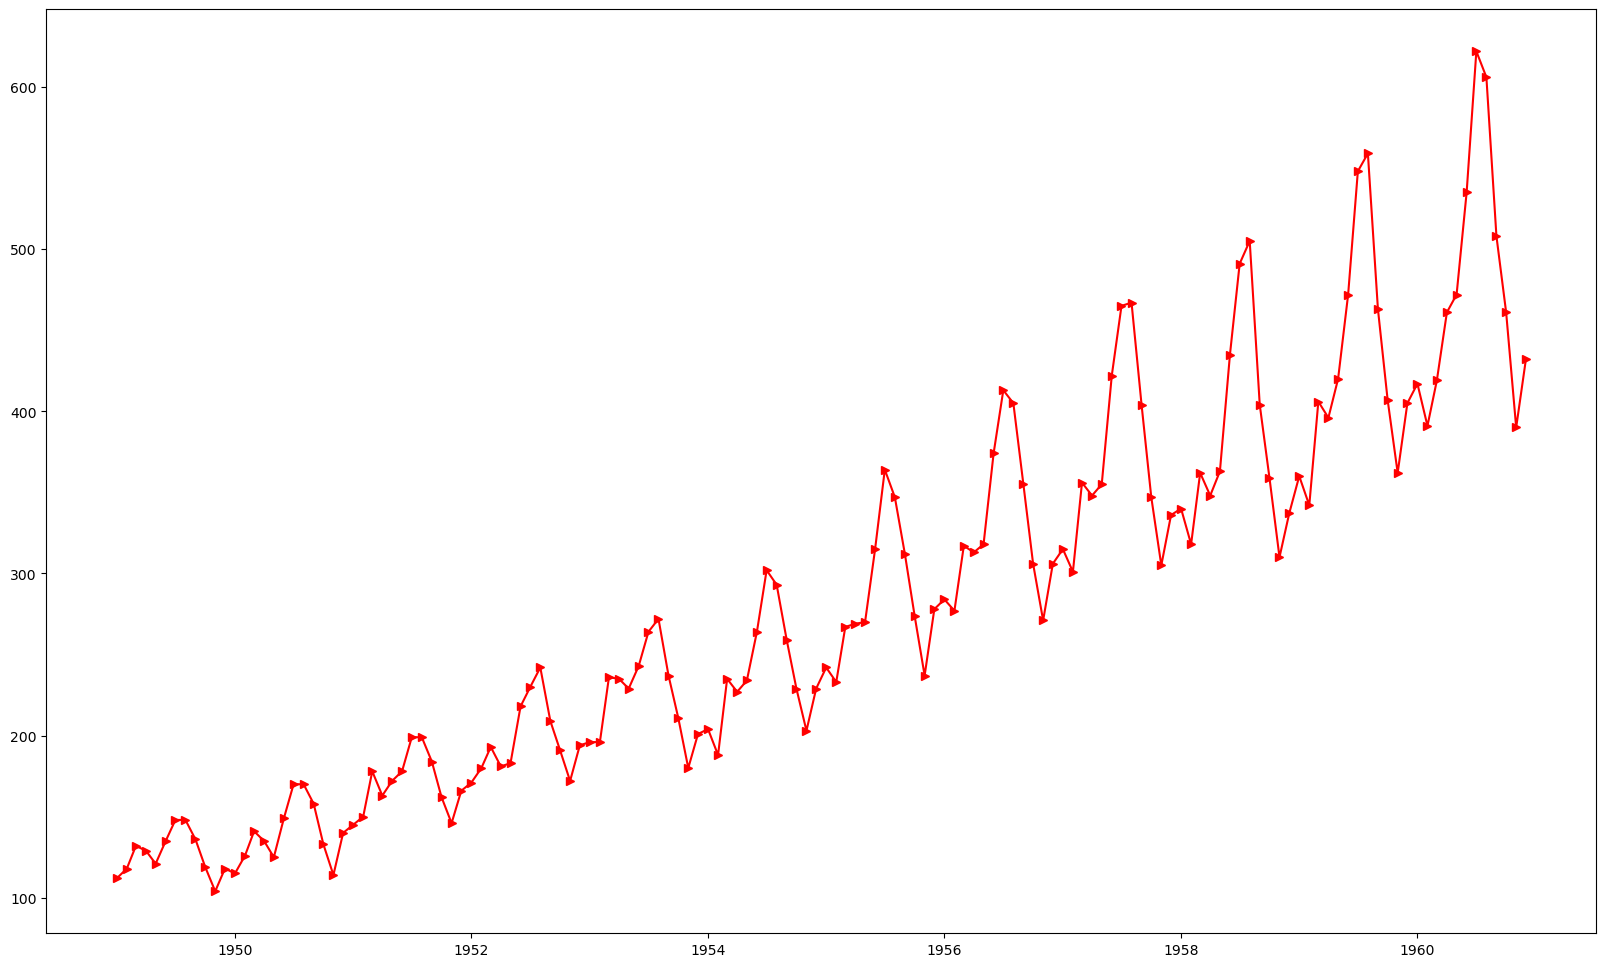

In [16]:
plt.figure(figsize=(20, 12))
plt.plot(data['Month'], data['AirPassengers'], 'r>-')

In [18]:
p = Prophet()

In [19]:
data = data.rename(columns={# In prophet the feature  column is ds and the target column is y
    'Month': 'ds',
    'AirPassengers': 'y'
})
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [23]:
data.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [20]:
p.fit(data)

00:03:01 - cmdstanpy - INFO - Chain [1] start processing
00:03:01 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = p.make_future_dataframe(periods=36, freq='MS')# the previous data has 144 rows this period include 36 month and overall is 144+36=180 rows
future.tail()# Infact the new month start from 1361/01/01 to 1363/12/01 with index 179

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [25]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [26]:
data

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [27]:
forecast = p.predict(future)

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.354536,57.702794,114.845673,106.354536,106.354536,-21.952141,-21.952141,-21.952141,-21.952141,-21.952141,-21.952141,0.0,0.0,0.0,84.402395
1,1949-02-01,108.537164,49.453306,107.152817,108.537164,108.537164,-30.711556,-30.711556,-30.711556,-30.711556,-30.711556,-30.711556,0.0,0.0,0.0,77.825607
2,1949-03-01,110.508569,79.563995,139.343254,110.508569,110.508569,-0.481427,-0.481427,-0.481427,-0.481427,-0.481427,-0.481427,0.0,0.0,0.0,110.027143
3,1949-04-01,112.691197,78.475907,135.521144,112.691197,112.691197,-5.189524,-5.189524,-5.189524,-5.189524,-5.189524,-5.189524,0.0,0.0,0.0,107.501673
4,1949-05-01,114.803417,81.945148,140.131992,114.803417,114.803417,-3.790598,-3.790598,-3.790598,-3.790598,-3.790598,-3.790598,0.0,0.0,0.0,111.012819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,581.789661,618.752968,678.586276,578.866113,584.405468,67.377650,67.377650,67.377650,67.377650,67.377650,67.377650,0.0,0.0,0.0,649.167311
176,1963-09-01,584.898252,572.628297,631.738125,581.817039,587.654920,16.740487,16.740487,16.740487,16.740487,16.740487,16.740487,0.0,0.0,0.0,601.638740
177,1963-10-01,587.906567,536.504743,593.519036,584.705115,590.787898,-22.289276,-22.289276,-22.289276,-22.289276,-22.289276,-22.289276,0.0,0.0,0.0,565.617290
178,1963-11-01,591.015158,503.680039,562.327498,587.697030,594.007644,-57.372657,-57.372657,-57.372657,-57.372657,-57.372657,-57.372657,0.0,0.0,0.0,533.642501


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

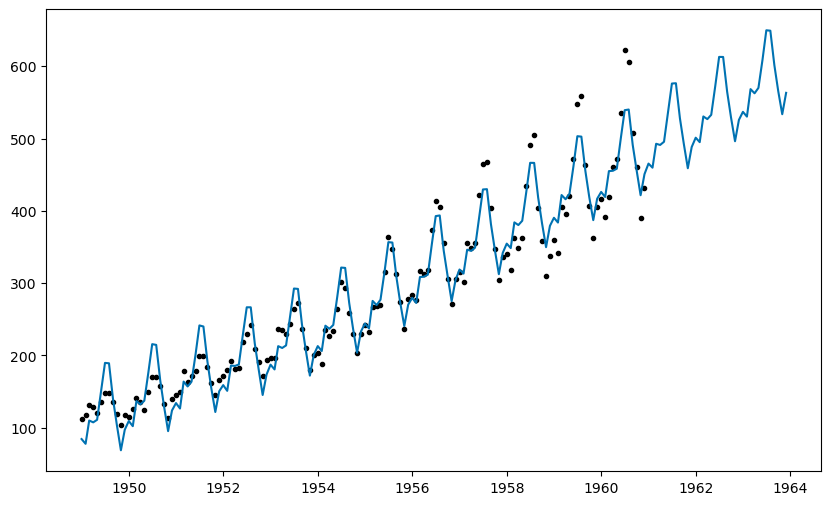

In [29]:
p.plot(forecast, uncertainty=True)